# **Manual Code**

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"adityasinha5730","key":"8e86d8fd8ebf2330b84c7b15a23dc709"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download dataset
!kaggle datasets download -d iarunava/cell-images-for-detecting-malaria
!unzip -q cell-images-for-detecting-malaria.zip

Dataset URL: https://www.kaggle.com/datasets/iarunava/cell-images-for-detecting-malaria
License(s): unknown
 96% 651M/675M [00:01<00:00, 265MB/s]
100% 675M/675M [00:03<00:00, 182MB/s]


In [ ]:
data_dir = "cell_images/cell_images"
train_datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_ds = train_datagen.flow_from_directory(
    data_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    subset='training',
    seed=42,
    shuffle=True
)

val_ds = val_datagen.flow_from_directory(
    data_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    subset='validation',
    seed=42,
    shuffle=True
)


FileNotFoundError: [Errno 2] No such file or directory: 'cell_images/cell_images'

In [ ]:
#for images, labels in train_ds.take(1):
#    print("Labels example:", labels.numpy())

Labels example: [1 1 0 0 0 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 0 1 0 0 0 1 0 1 1 0 1 1]


In [ ]:
#normalization_layer=tf.keras.layers.Rescaling(1./255)
#train_ds=train_ds.map(lambda x,y:(normalization_layer(x),y))
#val_ds=val_ds.map(lambda x,y:(normalization_layer(x),y))

In [ ]:
model=Sequential()

#Conv Block 1
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',padding='same',strides=(1,1),input_shape=(64,64,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


#Conv Block 2
model.add(Conv2D(64,kernel_size=(3,3),activation="relu",padding="same",strides=(1,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


##Conv Block 3

model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same',strides=(1,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))


#Fully Connected Layer
model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0003),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
trained_model=model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds
)

Epoch 1/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 65s 83ms/step - accuracy: 0.6288 - loss: 0.7563 - val_accuracy: 0.7022 - val_loss: 0.8420
Epoch 2/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 57s 82ms/step - accuracy: 0.8772 - loss: 0.2996 - val_accuracy: 0.9176 - val_loss: 0.2454
Epoch 3/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 66s 96ms/step - accuracy: 0.9434 - loss: 0.1826 - val_accuracy: 0.9243 - val_loss: 0.3600
Epoch 4/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 57s 82ms/step - accuracy: 0.9452 - loss: 0.1714 - val_accuracy: 0.9272 - val_loss: 0.2785
Epoch 5/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 56s 81ms/step - accuracy: 0.9519 - loss: 0.1590 - val_accuracy: 0.9234 - val_loss: 0.2530
Epoch 6/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 56s 82ms/step - accuracy: 0.9525 - loss: 0.1521 - val_accuracy: 0.9394 - val_loss: 0.2343
Epoch 7/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 67s 98ms/step - accuracy: 0.9560 - loss: 0.1440 - val_accuracy: 0.8630 - val_loss: 0.3662
Epoch 8/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 57s 83ms/step - accuracy: 0.9561 - loss: 0.1385 - 

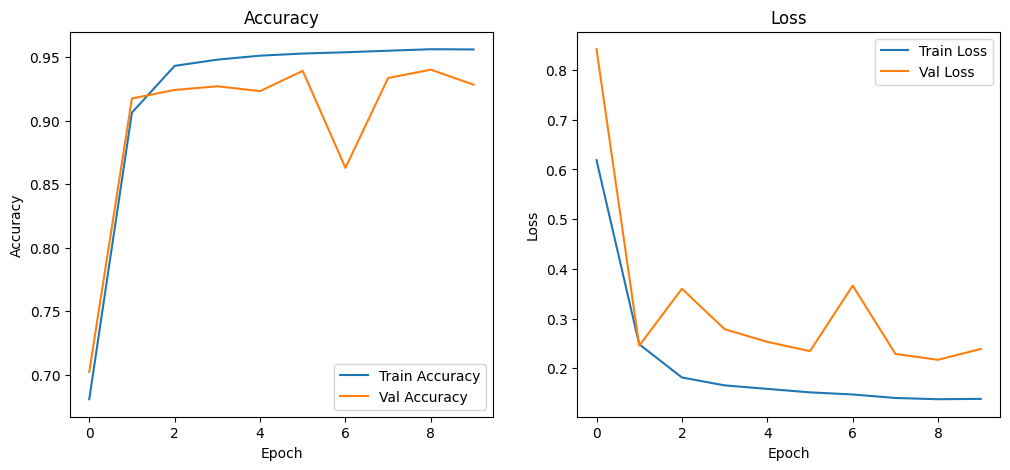

In [ ]:
plt.figure(figsize=(12,5))

# Accuracy plot
plt.subplot(1,2,1)
plt.plot(trained_model.history['accuracy'], label='Train Accuracy')
plt.plot(trained_model.history['val_accuracy'], label='Val Accuracy')
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Loss plot
plt.subplot(1,2,2)
plt.plot(trained_model.history['loss'], label='Train Loss')
plt.plot(trained_model.history['val_loss'], label='Val Loss')
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [ ]:
model.save('malaria_model.h5')

In [ ]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load saved model
model = load_model("malaria_model.h5")

# Path to dataset (any class — we’ll search both)
data_dir = "/content/cell_images/cell_images"
categories = ['Parasitized', 'Uninfected']

# Pick 5 random image paths from both classes
image_paths = []
for cat in categories:
    cat_path = os.path.join(data_dir, cat)
    files = os.listdir(cat_path)
    full_paths = [os.path.join(cat_path, f) for f in files]
    image_paths.extend(random.sample(full_paths, 3))

# Shuffle and trim to 5
random.shuffle(image_paths)
image_paths = image_paths[:5]

def predict_and_plot(img_path):
    img = image.load_img(img_path, target_size=(64, 64))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)[0][0]
    label = 'Parasitized' if prediction < 0.5 else 'Uninfected'
    confidence = 1 - prediction if prediction < 0.5 else prediction

    return img, label, confidence

plt.figure(figsize=(15, 8))
for i, img_path in enumerate(image_paths):
    img, label, conf = predict_and_plot(img_path)
    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    plt.title(f"{label}\nConf: {conf:.2f}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
def predict_and_plot(img_path):
    img = image.load_img(img_path, target_size=(64, 64))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)[0][0]
    label = 'Parasitized' if prediction < 0.5 else 'Uninfected'
    confidence = 1 - prediction if prediction < 0.5 else prediction

    return img, label, confidence


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


/tmp/ipython-input-69-1831703057.py:9: UserWarning: Glyph 129440 (\N{MICROBE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


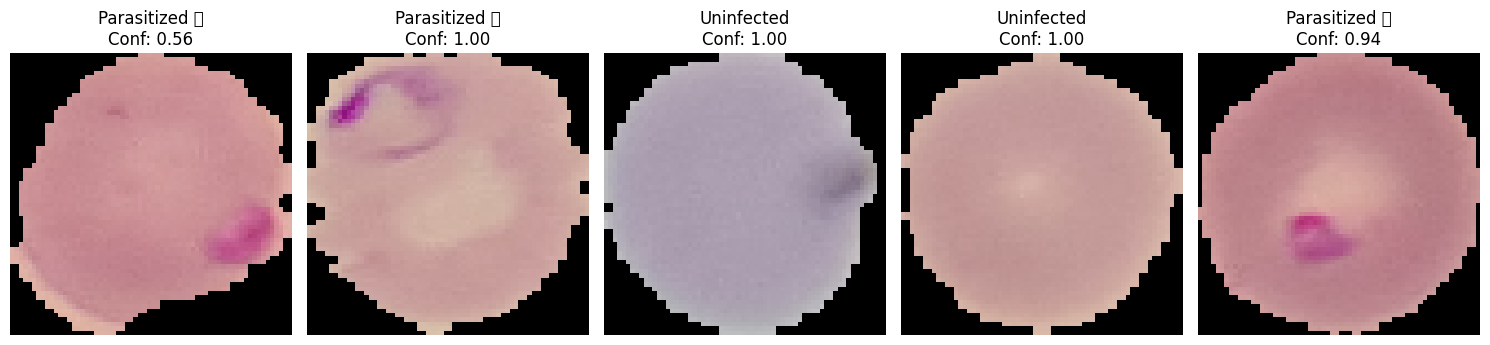

In [ ]:
plt.figure(figsize=(15, 8))
for i, img_path in enumerate(image_paths):
    img, label, conf = predict_and_plot(img_path)
    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    plt.title(f"{label}\nConf: {conf:.2f}")
    plt.axis('off')

plt.tight_layout()
plt.show()

## **Transfer Learning**

In [3]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

In [4]:
conv_base=VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(128,128,3)
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
model=Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [6]:
conv_base.trainable=False

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
data_dir = "cell_images/cell_images"

# Train datagen with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

# Validation datagen without augmentation, but same split
val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='training',
    shuffle=True,
    seed=42
)

validation_generator = val_datagen.flow_from_directory(
    data_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='validation',
    shuffle=True,
    seed=42
)


Found 22048 images belonging to 2 classes.
Found 5510 images belonging to 2 classes.


In [9]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [10]:
model_train2 = model.fit(
        train_generator,
        epochs=10,
        validation_data=validation_generator)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 129s 177ms/step - accuracy: 0.8298 - loss: 0.4029 - val_accuracy: 0.9238 - val_loss: 0.1898
Epoch 2/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 121s 176ms/step - accuracy: 0.9349 - loss: 0.1777 - val_accuracy: 0.8936 - val_loss: 0.2724
Epoch 3/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 138s 170ms/step - accuracy: 0.9315 - loss: 0.1794 - val_accuracy: 0.8902 - val_loss: 0.3081
Epoch 4/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 117s 170ms/step - accuracy: 0.9440 - loss: 0.1537 - val_accuracy: 0.9356 - val_loss: 0.1727
Epoch 5/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 118s 171ms/step - accuracy: 0.9405 - loss: 0.1624 - val_accuracy: 0.9229 - val_loss: 0.1998
Epoch 6/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 119s 172ms/step - accuracy: 0.9411 - loss: 0.1597 - val_accuracy: 0.9307 - val_loss: 0.1773
Epoch 7/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 118s 171ms/step - accuracy: 0.9432 - loss: 0.1544 - val_accuracy: 0.9243 - val_loss: 0.2016
Epoch 8/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 123s 178ms/step - accuracy: 0.9445 -

## **Fine Tuning**

In [23]:
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

In [12]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(128,128,3)
)

In [13]:
conv_base.trainable = True

set_trainable = False

for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

for layer in conv_base.layers:
  print(layer.name,layer.trainable)

input_layer_2 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [14]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 7,079,424 (27.01 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [15]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [17]:
# ✅ Training dataset: 80%
train_ds = keras.utils.image_dataset_from_directory(
    directory=data_dir,
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(128, 128),
    validation_split=0.2,       # split 80-20
    subset="training",          # get training part
    seed=42                     # for reproducibility
)

# ✅ Validation dataset: 20%
validation_ds = keras.utils.image_dataset_from_directory(
    directory=data_dir,
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(128, 128),
    validation_split=0.2,       # same split
    subset="validation",        # get validation part
    seed=42
)


Found 27558 files belonging to 2 classes.
Using 22047 files for training.
Found 27558 files belonging to 2 classes.
Using 5511 files for validation.


In [18]:
# Normalize
def process(image,label):
    image = tensorflow.cast(image/255. ,tensorflow.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [20]:
model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [21]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 70s 95ms/step - accuracy: 0.8764 - loss: 0.2938 - val_accuracy: 0.9274 - val_loss: 0.1939
Epoch 2/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 71s 82ms/step - accuracy: 0.9515 - loss: 0.1329 - val_accuracy: 0.9537 - val_loss: 0.1224
Epoch 3/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 55s 80ms/step - accuracy: 0.9598 - loss: 0.1150 - val_accuracy: 0.9510 - val_loss: 0.1271
Epoch 4/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 56s 81ms/step - accuracy: 0.9649 - loss: 0.1023 - val_accuracy: 0.9621 - val_loss: 0.1090
Epoch 5/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 55s 80ms/step - accuracy: 0.9665 - loss: 0.0941 - val_accuracy: 0.9621 - val_loss: 0.1081
Epoch 6/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 56s 82ms/step - accuracy: 0.9708 - loss: 0.0840 - val_accuracy: 0.9614 - val_loss: 0.1093
Epoch 7/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 82s 82ms/step - accuracy: 0.9736 - loss: 0.0769 - val_accuracy: 0.9630 - val_loss: 0.1063
Epoch 8/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 55s 80ms/step - accuracy: 0.9762 - loss: 0.0696 - 

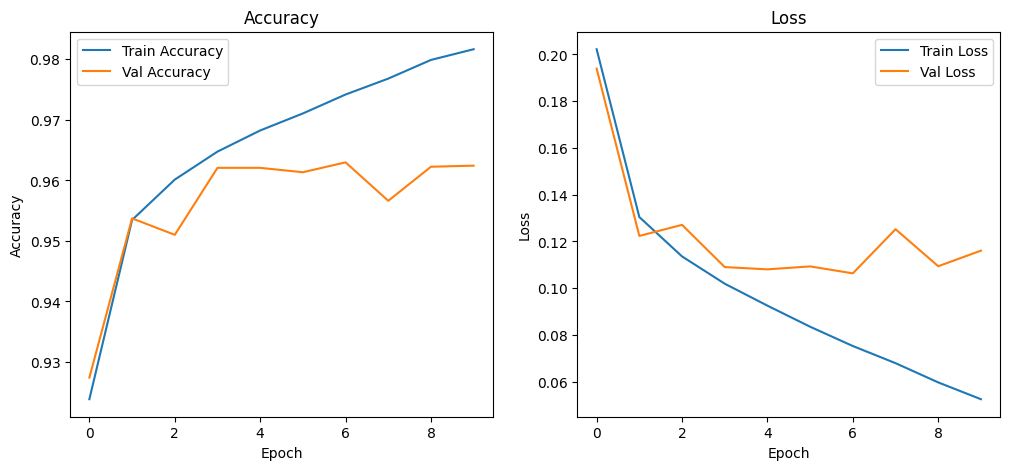

In [24]:
plt.figure(figsize=(12,5))

# Accuracy plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')

plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Loss plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [26]:
model.save('malaria_model_finetuning.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step


Exception ignored in: <function _xla_gc_callback at 0x79785b977100>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/jax/_src/lib/__init__.py", line 96, in _xla_gc_callback
    def _xla_gc_callback(*args):
    
KeyboardInterrupt: 


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


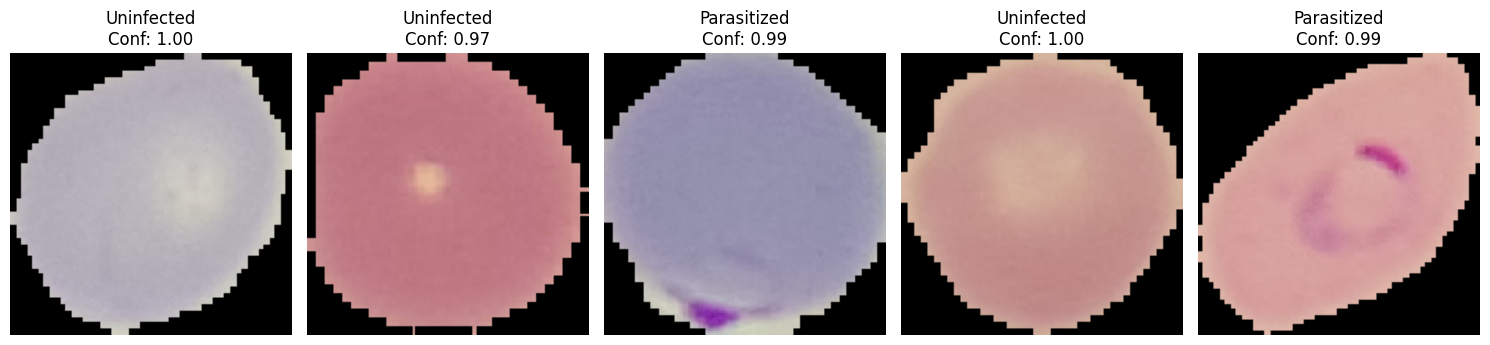

In [35]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load saved model
model = load_model("malaria_model_finetuning.h5")

# Path to dataset (any class — we’ll search both)
data_dir = "/content/cell_images/cell_images"
categories = ['Parasitized', 'Uninfected']

# Pick 5 random image paths from both classes
image_paths = []
for cat in categories:
    cat_path = os.path.join(data_dir, cat)
    files = os.listdir(cat_path)
    full_paths = [os.path.join(cat_path, f) for f in files]
    image_paths.extend(random.sample(full_paths, 3))

# Shuffle and trim to 5
random.shuffle(image_paths)
image_paths = image_paths[:5]

def predict_and_plot(img_path):
    img = image.load_img(img_path, target_size=(128, 128,3))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)[0][0]
    label = 'Parasitized' if prediction < 0.5 else 'Uninfected'
    confidence = 1 - prediction if prediction < 0.5 else prediction

    return img, label, confidence

plt.figure(figsize=(15, 8))
for i, img_path in enumerate(image_paths):
    img, label, conf = predict_and_plot(img_path)
    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    plt.title(f"{label}\nConf: {conf:.2f}")
    plt.axis('off')

plt.tight_layout()
plt.show()
